# Bandit Algorithms

Online decision-making involves a chioce of **exploration-expliotation** and bandits model have widely applications likes: ...

The goal is: maximize expected cumulative reward.

The reward model:

1. **IID reward:**
2. **Adversarial reward:**
3. **Constrained adversarial reward:**
4. **Stochastic reward(beyond IID):** random process, e.g., a random walk.

## Stochastic bandits

In each round, the agent can only observe the reward of chosen action and the rewards are bounded. Every time an action $a$ is chosen, the reward is sampled independently from the reward distribution associated with the action $a$.
A multi-armed bandit is the tuple $<\mathcal{A}, \mathcal{R}>$ where $\mathcal{A}$ is the set of actions(arms) and the $\mathcal{R}$ is the unknown reward distribution, $\mathcal{R}^a(r)= \mathbb{P}[r|a]$. At each round $t$, an agent select the action $a_t \in \mathcal{R}$, receive a reward $r_t \sim \mathcal{R}^a(t)$

## UCB algorithm

## Thompson sampling

## Gradient bandit

## Gaussian process regression

## Gaussian processes bandit

### GP-UCB

### GP-TS

## Greedy algorithm

We consoder the algorithms that estimate the $Q(a)$ by Monte-Carlo evaluation:
$$\hat{Q}_t(a) = \frac{1}{N_{t-1}(a)}\sum\limits_{\tau=1}^{t-1}r_{\tau}\mathbf{1}_\tau $$
The greedy algorithm selects action with highest estimated value: $$a_t = \arg\max_{a\in \mathcal{A}} \hat{Q}_t(a)$$

But the greedy algorithm will lock onto the suboptimal action forever, which means the greedy algorithm is given to eploiting rather heavily. So, we need to force it to try other actions by utilizing a random selection with a probability $ \epsilon $ at each round. At each round $t$, the agent will:
* with probability $1-\epsilon$ select $a_t = \arg\max_{a\in \mathcal{A}} \hat{Q}_t(a)$
* with probability $\epsilon$ select a random action.


Arms:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Optimal arm:  1


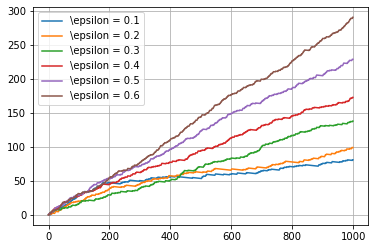

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from banidts.envs import MutiBernArmEnv
from algorithms.simple_algorithms import epGreedyAgent
from utils import cumulate

num_arms = 10
T =1000
ep_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

actions = list(range(num_arms))
ps = np.random.uniform(0,1,size=num_arms)

mBern_env_lists= []
for i in range(6):
    mBern_env_lists.append(
        MutiBernArmEnv(actions, ps)
    )
print("Arms: ", mBern_env_lists[1].arms_names)
print("Optimal arm: ", mBern_env_lists[1].optimal)

agents_list = []
for ep in ep_list:
    agents_list.append(
        epGreedyAgent(actions, ep)
    )

for t in range(T):
    for i in range(len(ep_list)):
        action = agents_list[i].decide()
        reward = mBern_env_lists[i].take(action)
        agents_list[i].update(reward)

cumulative_regrets_list = []
for env in mBern_env_lists:
    cumulative_regrets_list.append(
        cumulate(env.regrets)
    )

plt.figure()
plt.plot(cumulative_regrets_list[0], label="\epsilon = 0.1")
plt.plot(cumulative_regrets_list[1], label="\epsilon = 0.2")
plt.plot(cumulative_regrets_list[2], label="\epsilon = 0.3")
plt.plot(cumulative_regrets_list[3], label="\epsilon = 0.4")
plt.plot(cumulative_regrets_list[4], label="\epsilon = 0.5")
plt.plot(cumulative_regrets_list[5], label="\epsilon = 0.6")
plt.legend()
plt.grid()
